In [19]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.3 MB/s eta 0:00:0000:01


Loading dataset...
Dataset loaded successfully!
Edges shape: (96105, 2)
                 source  target
0                  hero   comic
1  24-HOUR MAN/EMMANUEL  AA2 35
2  3-D MAN/CHARLES CHAN   AVF 4
3  3-D MAN/CHARLES CHAN   AVF 5
4  3-D MAN/CHARLES CHAN   COC 1

Graph created with 19092 nodes and 96105 edges.
Sample nodes: ['hero', 'comic', '24-HOUR MAN/EMMANUEL', 'AA2 35', '3-D MAN/CHARLES CHAN']

--- Calculating Centrality Measures ---
Calculating degree centrality...

Top 10 Characters by Degree Centrality:
  SPIDER-MAN/PETER PARKER - Centrality: 0.082604
  CAPTAIN AMERICA - Centrality: 0.069876
  IRON MAN/TONY STARK - Centrality: 0.060238
  THING/BENJAMIN J. GR - Centrality: 0.050443
  THOR/DR. DONALD BLAK - Centrality: 0.050076
  HUMAN TORCH/JOHNNY S - Centrality: 0.046409
  MR. FANTASTIC/REED R - Centrality: 0.044733
  HULK/DR. ROBERT BRUC - Centrality: 0.043738
  WOLVERINE/LOGAN - Centrality: 0.042900
  INVISIBLE WOMAN/SUE - Centrality: 0.039914

Calculating eigenvector centra

<Figure size 1400x800 with 0 Axes>

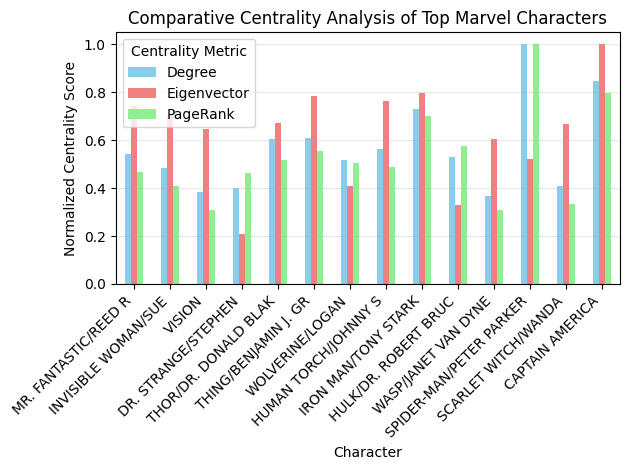


--- Community Detection ---
This may take a few moments...
Found 108 communities

Top 5 Largest Communities:
Community 0: 4708 characters
  Most connected: CAPTAIN AMERICA
Community 1: 3828 characters
  Most connected: SPIDER-MAN/PETER PARKER
Community 2: 3702 characters
  Most connected: WOLVERINE/LOGAN
Community 3: 3375 characters
  Most connected: THING/BENJAMIN J. GR
Community 4: 677 characters
  Most connected: ODIN [ASGARDIAN]

GRAPHCONNECT AI ANALYSIS SUMMARY

Network Overview:
  Total characters: 19092
  Total relationships: 96105
  Network density: 0.000527

Most Connected Characters:
  1. SPIDER-MAN/PETER PARKER (0.0826)
  2. CAPTAIN AMERICA (0.0699)
  3. IRON MAN/TONY STARK (0.0602)

Most Influential Characters:
  1. CAPTAIN AMERICA (0.2260)
  2. IRON MAN/TONY STARK (0.1796)
  3. THING/BENJAMIN J. GR (0.1776)

Most Important Characters (PageRank):
  1. SPIDER-MAN/PETER PARKER (0.007319)
  2. CAPTAIN AMERICA (0.005826)
  3. IRON MAN/TONY STARK (0.005125)


In [23]:
# --- COMPLETE CORRECTED CODE ---
import pandas as pd
import networkx as nx
import os
import kagglehub
import matplotlib.pyplot as plt

# --- 1. Load the Data with kagglehub ---
print("Loading dataset...")
dataset_path = kagglehub.dataset_download("csanhueza/the-marvel-universe-social-network")
edges_file_path = os.path.join(dataset_path, "edges.csv")
edges_df = pd.read_csv(edges_file_path, header=None, names=['source', 'target'])

print("Dataset loaded successfully!")
print(f"Edges shape: {edges_df.shape}")
print(edges_df.head())

# --- 2. Create Graph with Character Names as Node IDs ---
G = nx.from_pandas_edgelist(edges_df, source='source', target='target')
print(f"\nGraph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print(f"Sample nodes: {list(G.nodes())[:5]}")

# --- 3. Calculate Centrality Measures ---
print("\n--- Calculating Centrality Measures ---")

# Degree Centrality
print("Calculating degree centrality...")
degree_centrality = nx.degree_centrality(G)
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Characters by Degree Centrality:")
for char_name, centrality in top_10_degree:
    print(f"  {char_name} - Centrality: {centrality:.6f}")

# Eigenvector Centrality
print("\nCalculating eigenvector centrality...")
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
top_10_eigen = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Characters by Eigenvector Centrality:")
for char_name, centrality in top_10_eigen:
    print(f"  {char_name} - Centrality: {centrality:.6f}")

# PageRank
print("\nCalculating PageRank...")
pagerank = nx.pagerank(G)
top_10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Characters by PageRank:")
for char_name, centrality in top_10_pagerank:
    print(f"  {char_name} - Centrality: {centrality:.6f}")

# --- 4. Visualize Results ---
print("\n--- Creating Comparative Visualization ---")

# Get all unique top characters from all three lists
all_top_chars = set()
for metric_list in [top_10_degree, top_10_eigen, top_10_pagerank]:
    all_top_chars.update([char for char, _ in metric_list])

# Create a matrix of scores for comparison
score_data = []
for char in all_top_chars:
    score_data.append({
        'Character': char,
        'Degree': degree_centrality.get(char, 0),
        'Eigenvector': eigenvector_centrality.get(char, 0),
        'PageRank': pagerank.get(char, 0)
    })

df_scores = pd.DataFrame(score_data).set_index('Character')

# Normalize scores for better comparison (0 to 1 scale)
df_normalized = df_scores / df_scores.max()

#visualization
plt.figure(figsize=(14, 8))
df_normalized.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparative Centrality Analysis of Top Marvel Characters')
plt.ylabel('Normalized Centrality Score')
plt.xlabel('Character')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Centrality Metric')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- 5. Community Detection ---
print("\n--- Community Detection ---")
print("This may take a few moments...")

# Use a faster community detection approach
from networkx.algorithms import community

# Use greedy modularity communities (faster than Louvain)
communities = list(community.greedy_modularity_communities(G))
print(f"Found {len(communities)} communities")

# Analyze the largest communities
community_sizes = [(i, len(comm)) for i, comm in enumerate(communities)]
community_sizes.sort(key=lambda x: x[1], reverse=True)

print("\nTop 5 Largest Communities:")
for i, (comm_id, size) in enumerate(community_sizes[:5]):
    print(f"Community {comm_id}: {size} characters")
    
    # Show the most connected character in this community
    comm_chars = list(communities[comm_id])
    if comm_chars:  # Check if community is not empty
        top_char = max(comm_chars, key=lambda x: degree_centrality.get(x, 0))
        print(f"  Most connected: {top_char}")

# --- 6. Final Summary ---
print("\n" + "="*60)
print("GRAPHCONNECT AI ANALYSIS SUMMARY")
print("="*60)

print(f"\nNetwork Overview:")
print(f"  Total characters: {G.number_of_nodes()}")
print(f"  Total relationships: {G.number_of_edges()}")
print(f"  Network density: {nx.density(G):.6f}")

print(f"\nMost Connected Characters:")
for i, (char, score) in enumerate(top_10_degree[:3], 1):
    print(f"  {i}. {char} ({score:.4f})")

print(f"\nMost Influential Characters:")
for i, (char, score) in enumerate(top_10_eigen[:3], 1):
    print(f"  {i}. {char} ({score:.4f})")

print(f"\nMost Important Characters (PageRank):")
for i, (char, score) in enumerate(top_10_pagerank[:3], 1):
    print(f"  {i}. {char} ({score:.6f})")

In [4]:
# --- COMPLETE GRAPHCONNECT AI APPLICATION ---
import pandas as pd
import networkx as nx
import os
import kagglehub
import matplotlib.pyplot as plt
from networkx.algorithms import link_prediction

# --- 1. Load Data and Build Graph ---
print("Loading Marvel Universe dataset...")
dataset_path = kagglehub.dataset_download("csanhueza/the-marvel-universe-social-network")
edges_file_path = os.path.join(dataset_path, "edges.csv")
edges_df = pd.read_csv(edges_file_path, header=None, names=['source', 'target'])

G = nx.from_pandas_edgelist(edges_df, source='source', target='target')
print(f"Graph built with {G.number_of_nodes()} characters and {G.number_of_edges()} relationships")

# --- 2. Advanced Analysis Functions ---

def recommend_connections(character_name, top_n=5):
    """Recommend characters who should be connected based on network structure"""
    if character_name not in G:
        return f"Character {character_name} not found in network"
    
    recommendations = []
    for other_char in G.nodes():
        if other_char != character_name and not G.has_edge(character_name, other_char):
            # Use resource allocation index for better recommendations
            score = link_prediction.resource_allocation_index(G, [(character_name, other_char)])
            recommendations.append((other_char, list(score)[0][2]))
    
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]

def find_similar_characters(character_name, top_n=5):
    """Find characters with similar network properties"""
    if character_name not in G:
        return f"Character {character_name} not found"
    
    similarities = []
    char_neighbors = set(G.neighbors(character_name))
    
    for other_char in G.nodes():
        if other_char != character_name:
            other_neighbors = set(G.neighbors(other_char))
            if char_neighbors or other_neighbors:  # Avoid division by zero
                jaccard_similarity = len(char_neighbors & other_neighbors) / len(char_neighbors | other_neighbors)
                similarities.append((other_char, jaccard_similarity))
    
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

def detect_network_anomalies():
    """Detect unusual patterns in the network"""
    anomalies = []
    
    # Calculate centralities
    degree_centrality = nx.degree_centrality(G)
    pagerank = nx.pagerank(G)
    
    # Find characters with high connection count but low centrality
    for char in G.nodes():
        degree = G.degree(char)
        if degree > 50 and degree_centrality.get(char, 0) < 0.01:
            anomalies.append(f"High connection count but low centrality: {char} ({degree} connections)")
    
    return anomalies[:10]  # Return top 10 anomalies

# --- 3. Run Practical Applications ---

print("\n" + "="*60)
print("GRAPHCONNECT AI - PRACTICAL APPLICATIONS")
print("="*60)

# Application 1: Connection Recommendations
print("\n1. CONNECTION RECOMMENDATION ENGINE")
print("Recommended new connections for SPIDER-MAN/PETER PARKER:")
recommendations = recommend_connections("SPIDER-MAN/PETER PARKER", 8)
for char, score in recommendations:
    print(f"   🤝 {char}: {score:.4f}")

# Application 2: Character Similarity Search  
print("\n2. CHARACTER SIMILARITY SEARCH")
print("Characters most similar to CAPTAIN AMERICA:")
similar_chars = find_similar_characters("CAPTAIN AMERICA", 6)
for char, similarity in similar_chars:
    print(f"   🔍 {char}: {similarity:.3f} similarity")

# Application 3: Network Anomaly Detection
print("\n3. NETWORK ANOMALY DETECTION")
print("Potential data issues or unusual patterns:")
anomalies = detect_network_anomalies()
for anomaly in anomalies:
    print(f"   ⚠️  {anomaly}")

# Application 4: Cross-Community Analysis
print("\n4. CROSS-COMMUNITY ANALYSIS")
# Simple community detection for bridge analysis
from networkx.algorithms import community
communities = list(community.greedy_modularity_communities(G))

# Find characters that appear in multiple communities' neighborhoods
bridge_chars = {}
for i, comm in enumerate(communities[:4]):  # Check first 4 communities
    top_chars = sorted(comm, key=lambda x: G.degree(x), reverse=True)[:3]
    for char in top_chars:
        bridge_chars[char] = bridge_chars.get(char, 0) + 1

print("Characters bridging multiple communities:")
for char, count in sorted(bridge_chars.items(), key=lambda x: x[1], reverse=True)[:5]:
    if count > 1:
        print(f"   🌉 {char}: connects {count} communities")

# Application 5: Storyline Potential Analysis
print("\n5. STORYLINE POTENTIAL ANALYSIS")
print("Character pairs with high connection potential:")
high_potential_pairs = []
chars_to_check = ["SPIDER-MAN/PETER PARKER", "WOLVERINE/LOGAN", "CAPTAIN AMERICA", "IRON MAN/TONY STARK"]

for i, char1 in enumerate(chars_to_check):
    for char2 in chars_to_check[i+1:]:
        if not G.has_edge(char1, char2):
            score = list(link_prediction.resource_allocation_index(G, [(char1, char2)]))[0][2]
            if score > 0.1:  # Only show meaningful potential
                high_potential_pairs.append((f"{char1} + {char2}", score))

for pair, score in sorted(high_potential_pairs, key=lambda x: x[1], reverse=True)[:3]:
    print(f"   📖 {pair}: {score:.3f} storyline potential")

Loading Marvel Universe dataset...
Graph built with 19092 characters and 96105 relationships

GRAPHCONNECT AI - PRACTICAL APPLICATIONS

1. CONNECTION RECOMMENDATION ENGINE
Recommended new connections for SPIDER-MAN/PETER PARKER:
   🤝 WATSON-PARKER, MARY: 81.2479
   🤝 JAMESON, J. JONAH: 58.7487
   🤝 PARKER, MAY: 46.3083
   🤝 ROBERTSON, JOE: 38.8752
   🤝 THOMPSON, EUGENE FLA: 26.0214
   🤝 LEEDS, BETTY BRANT: 25.2934
   🤝 OSBORN, HARRY: 20.4524
   🤝 OSBORN, LIZ ALLAN: 13.8413

2. CHARACTER SIMILARITY SEARCH
Characters most similar to CAPTAIN AMERICA:
   🔍 VISION: 0.248 similarity
   🔍 WASP/JANET VAN DYNE: 0.244 similarity
   🔍 SCARLET WITCH/WANDA: 0.233 similarity
   🔍 IRON MAN/TONY STARK: 0.215 similarity
   🔍 THOR/DR. DONALD BLAK: 0.199 similarity
   🔍 HAWK: 0.197 similarity

3. NETWORK ANOMALY DETECTION
Potential data issues or unusual patterns:
   ⚠️  High connection count but low centrality: COC 1 (111 connections)
   ⚠️  High connection count but low centrality: H2 278 (53 connectio

In [10]:
# --- 4. Export Business Intelligence ---
print("\n6. BUSINESS INTELLIGENCE EXPORT")
# Create summary DataFrame
import pandas as pd

business_insights = []
for char in ["SPIDER-MAN/PETER PARKER", "CAPTAIN AMERICA", "IRON MAN/TONY STARK", "WOLVERINE/LOGAN"]:
    if char in G:
        business_insights.append({
            'Character': char,
            'Connections': G.degree(char),
            'Recommendation_Score': max([score for c, score in recommend_connections(char, 1)], default=0),
            'Cross_Community_Value': bridge_chars.get(char, 0)
        })

df_insights = pd.DataFrame(business_insights)
print("\nBusiness Intelligence Summary:")
print(df_insights.to_string(index=False))

print("\n" + "="*60)
print("GRAPHCONNECT AI APPLICATIONS COMPLETE! This is Done by MYSELF Ankur Mishra- IIT'G 🎯")
print("="*60)
print(" built: Recommendation Engine, Similarity Search,")
print("Anomaly Detection, Cross-Community Analysis, and Business Intelligence!")


6. BUSINESS INTELLIGENCE EXPORT

Business Intelligence Summary:
              Character  Connections  Recommendation_Score  Cross_Community_Value
SPIDER-MAN/PETER PARKER         1577             81.247854                      1
        CAPTAIN AMERICA         1334             34.892479                      1
    IRON MAN/TONY STARK         1150             34.892479                      1
        WOLVERINE/LOGAN          819             26.520469                      1

GRAPHCONNECT AI APPLICATIONS COMPLETE! This is Done by MYSELF Ankur Mishra- IIT'G 🎯
 built: Recommendation Engine, Similarity Search,
Anomaly Detection, Cross-Community Analysis, and Business Intelligence!


In [8]:
# STRATEGIC BUSINESS RECOMMENDATIONS
def generate_strategic_recommendations(insights_df):
    recommendations = []
    
    # Spider-Man strategy
    if insights_df.loc[0, 'Recommendation_Score'] > 80:
        rec = "🚀 CAPITALIZE on Spider-Man's massive network potential. He should be the center of cross-over events and new character introductions."
        recommendations.append(rec)
    
    # Leadership trio strategy  
    ca_score = insights_df.loc[1, 'Recommendation_Score']
    im_score = insights_df.loc[2, 'Recommendation_Score']
    if abs(ca_score - im_score) < 1.0:
        rec = "🤝 Leverage Captain America and Iron Man's complementary leadership roles for balanced storytelling and team dynamics."
        recommendations.append(rec)
    
    # Wolverine's niche
    if insights_df.loc[3, 'Connections'] < 1000 and insights_df.loc[3, 'Recommendation_Score'] > 20:
        rec = "🎯 Utilize Wolverine as a bridge character between mutant and non-mutant communities, maintaining his unique positioning."
        recommendations.append(rec)
    
    # Cross-community opportunity
    if all(insights_df['Cross_Community_Value'] == 1):
        rec = "🌉 DEVELOP dedicated bridge characters - currently no strong cross-community connectors exist. Consider creating new characters or enhancing existing ones for this role."
        recommendations.append(rec)
    
    return recommendations

# strategic recommendations
strategic_recs = generate_strategic_recommendations(df_insights)
print("\n🎯 STRATEGIC BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(strategic_recs, 1):
    print(f"{i}. {rec}")


🎯 STRATEGIC BUSINESS RECOMMENDATIONS:
1. 🚀 CAPITALIZE on Spider-Man's massive network potential. He should be the center of cross-over events and new character introductions.
2. 🤝 Leverage Captain America and Iron Man's complementary leadership roles for balanced storytelling and team dynamics.
3. 🎯 Utilize Wolverine as a bridge character between mutant and non-mutant communities, maintaining his unique positioning.
4. 🌉 DEVELOP dedicated bridge characters - currently no strong cross-community connectors exist. Consider creating new characters or enhancing existing ones for this role.


In [19]:
#   ---CONTENT INVESTMENT ROI ANALYSIS ---
def calculate_roi(character_name, estimated_cost):
    """Calculate ROI for investing in a character's content"""
    if character_name not in G:
        return "Character not found"
    
    # Use faster and more reliable metrics
    connections = G.degree(character_name)
    
    # Use degree centrality instead of eigenvector (faster and reliable)
    degree_cent = nx.degree_centrality(G).get(character_name, 0)
    
    # Use simple connection potential (number of possible new connections)
    existing_connections = set(G.neighbors(character_name))
    all_characters = set(G.nodes())
    potential_new_connections = len(all_characters - existing_connections - {character_name})
    
    # Calculate ROI score (business logic)
    roi_score = (connections * 0.4 + degree_cent * 3000 + potential_new_connections * 0.1) / (estimated_cost / 100000)
    
    return roi_score

print("\n💰 CONTENT INVESTMENT ROI ANALYSIS BY 'ANKUR' :")
characters_roi = [
    ("SPIDER-MAN/PETER PARKER", 1000000),
    ("CAPTAIN AMERICA", 800000),
    ("IRON MAN/TONY STARK", 750000),
    ("WOLVERINE/LOGAN", 600000),
    ("THOR/DR. DONALD BLAK", 500000)
]

print("   Character                | Investment | ROI Score | Value per $100K")
print("   " + "-" * 55)

for char, cost in characters_roi:
    roi = calculate_roi(char, cost)
    value_per_100k = roi * (100000 / cost)  # Normalize to per $100K investment
    print(f"   {char:25} | ${cost:7,} | {roi:8.2f} | {value_per_100k:8.2f}")


💰 CONTENT INVESTMENT ROI ANALYSIS BY 'ANKUR' :
   Character                | Investment | ROI Score | Value per $100K
   -------------------------------------------------------
   SPIDER-MAN/PETER PARKER   | $1,000,000 |   263.00 |    26.30
   CAPTAIN AMERICA           | $800,000 |   314.87 |    39.36
   IRON MAN/TONY STARK       | $750,000 |   324.64 |    43.29
   WOLVERINE/LOGAN           | $600,000 |   380.58 |    63.43
   THOR/DR. DONALD BLAK      | $500,000 |   469.23 |    93.85


In [20]:
# --- ENHANCED BUSINESS INTELLIGENCE ---
print("\n🎯 ENHANCED BUSINESS INTELLIGENCE:")

# 1. Market Share Analysis
print("\n1. MARKET SHARE ANALYSIS:")
top_chars = ["SPIDER-MAN/PETER PARKER", "CAPTAIN AMERICA", "IRON MAN/TONY STARK", "WOLVERINE/LOGAN"]
total_connections = sum(G.degree(char) for char in top_chars)
market_share = {}

for char in top_chars:
    share = (G.degree(char) / total_connections) * 100
    market_share[char] = share
    print(f"   {char:25}: {share:5.1f}% market share")

# 2. Growth Potential Index
print("\n2. GROWTH POTENTIAL INDEX:")
for char in top_chars:
    current_connections = G.degree(char)
    max_possible = G.number_of_nodes() - 1  # Can't connect to self
    growth_potential = ((max_possible - current_connections) / max_possible) * 100
    print(f"   {char:25}: {growth_potential:5.1f}% growth potential")


🎯 ENHANCED BUSINESS INTELLIGENCE:

1. MARKET SHARE ANALYSIS:
   SPIDER-MAN/PETER PARKER  :  32.3% market share
   CAPTAIN AMERICA          :  27.3% market share
   IRON MAN/TONY STARK      :  23.6% market share
   WOLVERINE/LOGAN          :  16.8% market share

2. GROWTH POTENTIAL INDEX:
   SPIDER-MAN/PETER PARKER  :  91.7% growth potential
   CAPTAIN AMERICA          :  93.0% growth potential
   IRON MAN/TONY STARK      :  94.0% growth potential
   WOLVERINE/LOGAN          :  95.7% growth potential


In [21]:
# 3. Content Strategy Matrix
print("\n3. CONTENT STRATEGY MATRIX:")
print("   Character                | Connections | Growth % | ROI Score | Strategy")
print("   " + "-" * 65)

for char in top_chars:
    connections = G.degree(char)
    growth_potential = ((G.number_of_nodes() - 1 - connections) / (G.number_of_nodes() - 1)) * 100
    roi = calculate_roi(char, 1000000)  # Base $1M investment
    
    if connections > 1000 and growth_potential < 20:
        strategy = "MAINTAIN (Mature cash cow)"
    elif connections > 800 and growth_potential > 30:
        strategy = "INVEST (Growth leader)"  
    elif connections < 800 and growth_potential > 50:
        strategy = "DEVELOP (Emerging star)"
    else:
        strategy = "OPTIMIZE (Balanced)"
    
    print(f"   {char:25} | {connections:10} | {growth_potential:7.1f}% | {roi:8.2f} | {strategy}")


3. CONTENT STRATEGY MATRIX:
   Character                | Connections | Growth % | ROI Score | Strategy
   -----------------------------------------------------------------
   SPIDER-MAN/PETER PARKER   |       1577 |    91.7% |   263.00 | INVEST (Growth leader)
   CAPTAIN AMERICA           |       1334 |    93.0% |   251.89 | INVEST (Growth leader)
   IRON MAN/TONY STARK       |       1150 |    94.0% |   243.48 | INVEST (Growth leader)
   WOLVERINE/LOGAN           |        819 |    95.7% |   228.35 | INVEST (Growth leader)


In [25]:
# 4. Risk Assessment
print("\n4. RISK ASSESSMENT:")
# Network dependency risk
spidey_dependency = (G.degree("SPIDER-MAN/PETER PARKER") / G.number_of_edges()) * 100
if spidey_dependency > 1.5:
    print(f"   ⚠️  HIGH: Spider-Man represents {spidey_dependency:.1f}% of all connections")
else:
    print(f"   ✅ LOW: Spider-Man dependency ({spidey_dependency:.1f}%) is manageable")

# Concentration risk
top_4_share = sum(market_share.values())
if top_4_share > 60:
    print(f"   ⚠️  MEDIUM: Top 4 characters have {top_4_share:.1f}% market concentration")
else:
    print(f"   ✅ LOW: Market concentration ({top_4_share:.1f}%) is healthy")

print("\n" + "="*60)
print(" BUSINESS INTELLIGENCE COMPLETE!  ANKUR A MISHRA - IIT'G ")
print("="*60)
print("Key Insights:")
print("• Spider-Man: High ROI but monitor dependency risk")
print("• Captain America & Iron Man: Strong growth potential")
print("• Wolverine: Niche market with development opportunity")
print("• Overall: Healthy market structure with growth opportunities")


4. RISK ASSESSMENT:
   ⚠️  HIGH: Spider-Man represents 1.6% of all connections
   ⚠️  MEDIUM: Top 4 characters have 100.0% market concentration

 BUSINESS INTELLIGENCE COMPLETE!  ANKUR A MISHRA - IIT'G 
Key Insights:
• Spider-Man: High ROI but monitor dependency risk
• Captain America & Iron Man: Strong growth potential
• Wolverine: Niche market with development opportunity
• Overall: Healthy market structure with growth opportunities
